In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from scipy.ndimage import gaussian_filter

import helpers

In [2]:
filename = 'benoitdata/F20_10_b/6um_jamtveit_att_pag-1.99_3.12_00030.tif'

img = cv2.imread(filename,0)


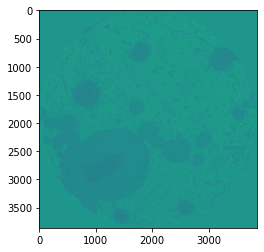

In [3]:
plt.imshow(img)

In [4]:
dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8)) 


In [5]:
bg_img = cv2.medianBlur(dilated_img, 21)


In [6]:
diff_img = 255 - cv2.absdiff(img, bg_img)


In [7]:
norm_img = diff_img.copy() # Needed for 3.x compatibility


In [8]:
cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

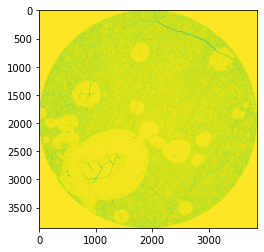

In [9]:
plt.imshow(norm_img)

In [10]:
imarr_hist = exposure.equalize_hist(norm_img)

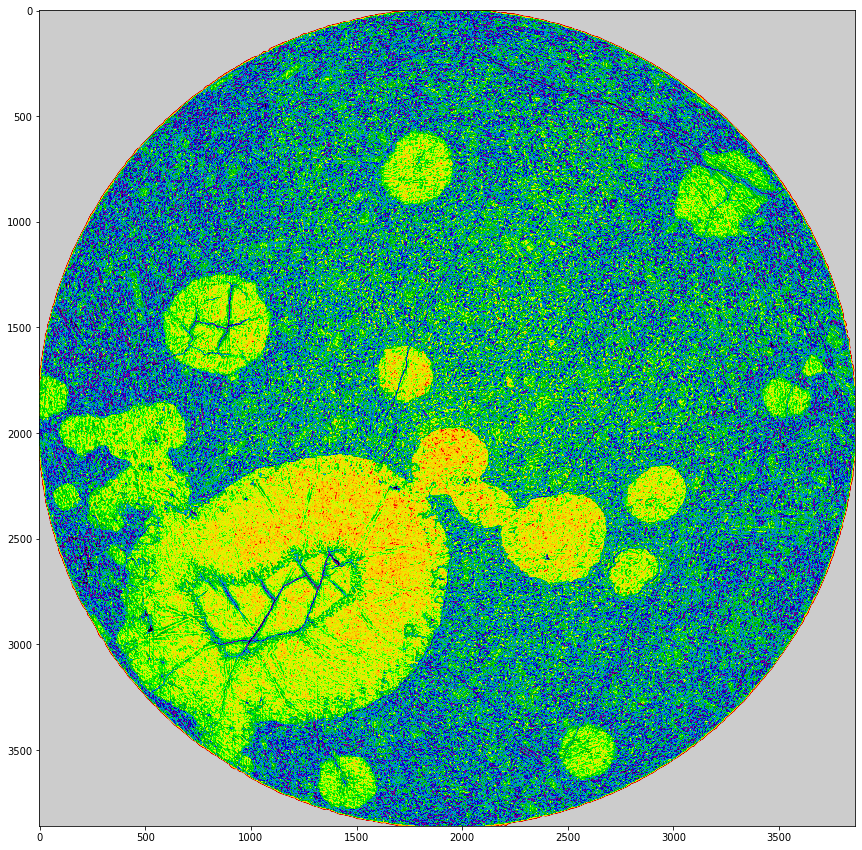

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(imarr_hist, cmap='nipy_spectral')

In [12]:
imarr_maskradius = helpers.remove_data_based_on_radius(imarr_hist, mask_value=np.nan)
sigma = 10
blur = gaussian_filter(imarr_maskradius, sigma=sigma)

imarr_maskradius = helpers.remove_data_based_on_radius(img, mask_value=np.nan)
blur2 = gaussian_filter(imarr_maskradius, sigma=sigma)


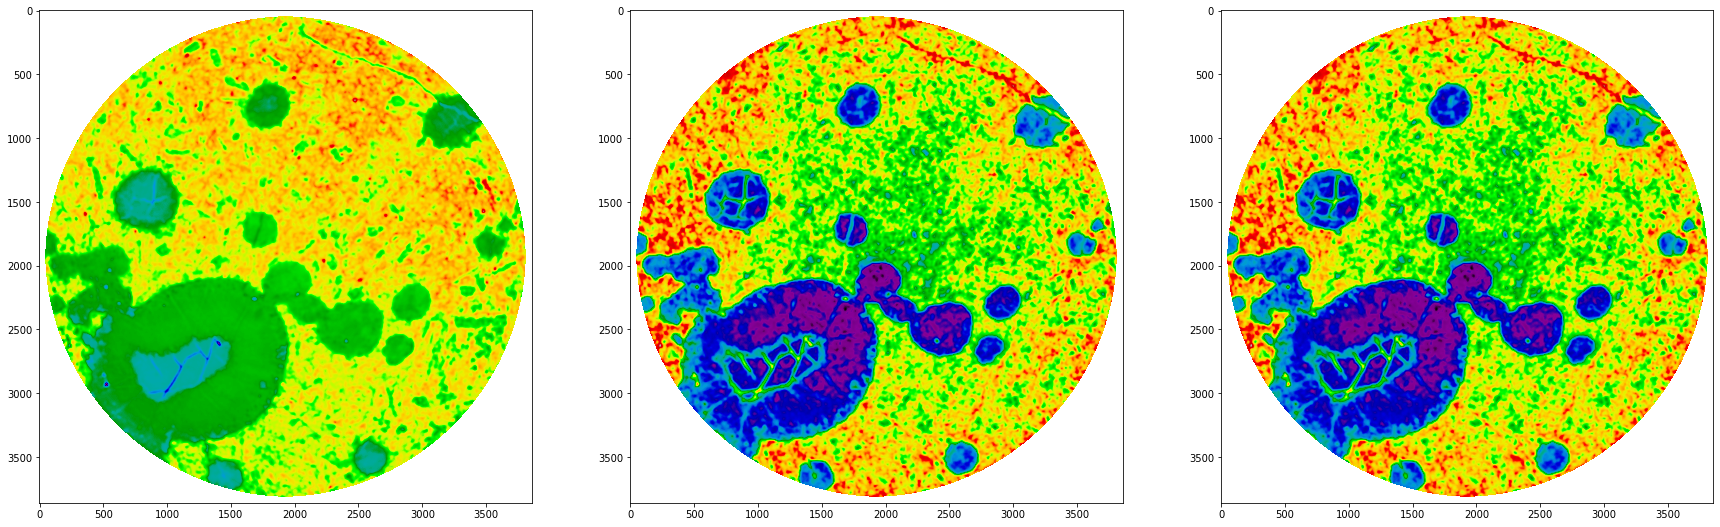

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(30, 15))
ax[0].imshow(blur2, cmap='nipy_spectral')
ax[1].imshow(blur, cmap='nipy_spectral_r')

_, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

ax[2].imshow(blur, cmap='nipy_spectral_r')
